### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

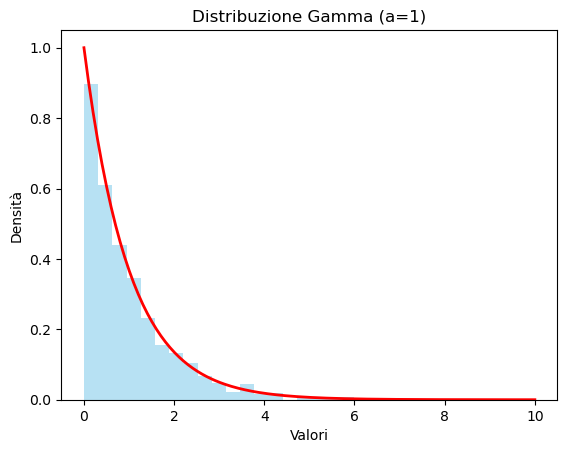

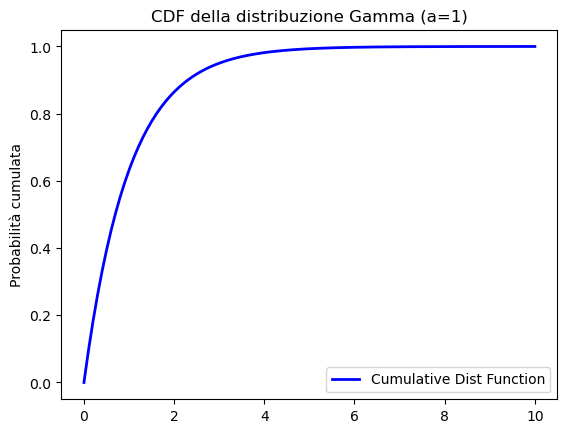

la varianza della funzione gamma è 1.0


In [17]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
#1
g = gamma(a=1)
#2
samples = g.rvs(size=1000) #1000 valori casuali 

x = np.linspace(0, 10, 200)
pdf_theoretical = g.pdf(x)
# 3. Istogramma per visualizzare i dati
plt.plot(x, pdf_theoretical, 'r-', lw=2, label='PDF teorica')
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Distribuzione Gamma (a=1)")
plt.xlabel("Valori")
plt.ylabel("Densità")
plt.show()

#funzione comulativa di distribuzione 
#stesso linspace di prima 
cumul=g.cdf(x)
plt.plot(x,cumul, 'b-', lw=2, label = 'Cumulative Dist Function')
plt.ylabel("Probabilità cumulata")
plt.title("CDF della distribuzione Gamma (a=1)")
plt.legend()
plt.show()


#calcolo varianza 
print (f'la varianza della funzione gamma è {g.var()}')



### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

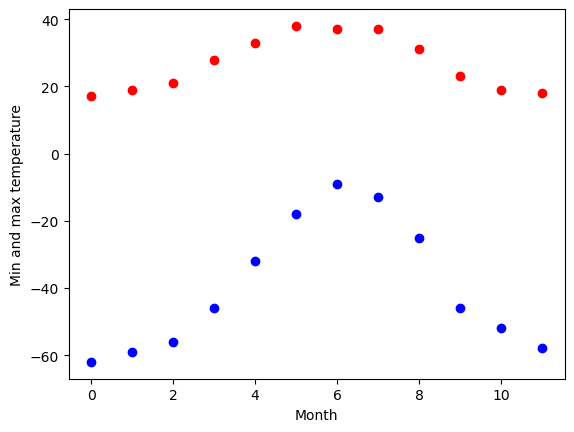

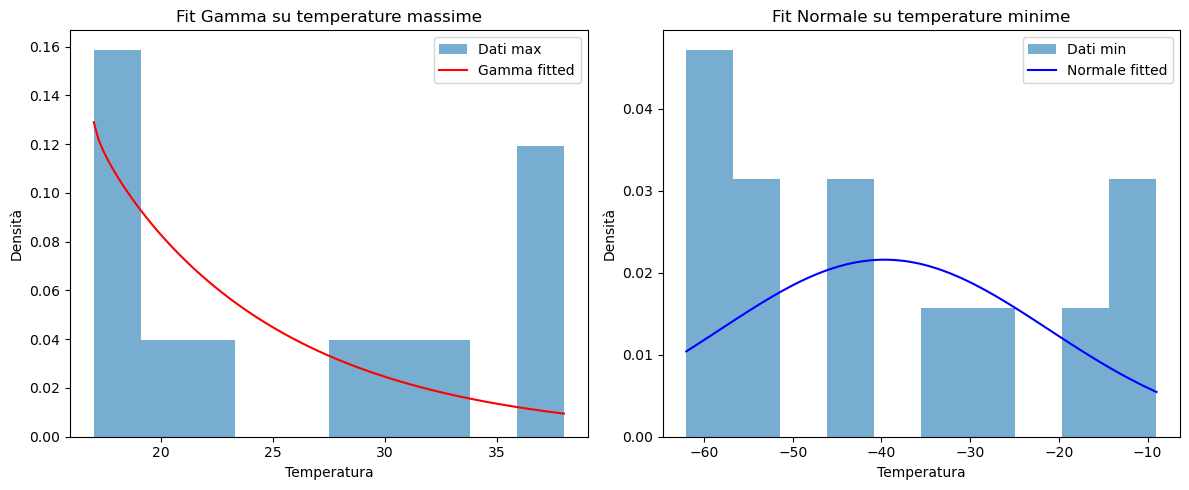

In [31]:
import numpy as np
from scipy.stats import gamma,norm
import matplotlib.pyplot as plt

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
# Fit gamma su temp_max
a_max, loc_max, scale_max = gamma.fit(temp_max)
x_max = np.linspace(min(temp_max), max(temp_max), 100)
pdf_max = gamma.pdf(x_max, a=a_max, loc=loc_max, scale=scale_max)

# Fit normale su temp_min (gamma non adatta per valori negativi)
mu_min, sigma_min = norm.fit(temp_min)
x_min = np.linspace(min(temp_min), max(temp_min), 100)
pdf_min = norm.pdf(x_min, loc=mu_min, scale=sigma_min)

# Grafico
plt.figure(figsize=(12, 5))

# Temp max + gamma
plt.subplot(1, 2, 1)
plt.hist(temp_max, bins=10, density=True, alpha=0.6, label="Dati max")
plt.plot(x_max, pdf_max, 'r-', label="Gamma fitted")
plt.title("Fit Gamma su temperature massime")
plt.xlabel("Temperatura")
plt.ylabel("Densità")
plt.legend()

# Temp min + normale
plt.subplot(1, 2, 2)
plt.hist(temp_min, bins=10, density=True, alpha=0.6, label="Dati min")
plt.plot(x_min, pdf_min, 'b-', label="Normale fitted")
plt.title("Fit Normale su temperature minime")
plt.xlabel("Temperatura")
plt.ylabel("Densità")
plt.legend()

plt.tight_layout()
plt.show()

#non capisco come mai venga cosi diverso 

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Coefficiente angolare (m): -17.43
Intercetta (q): 580.88


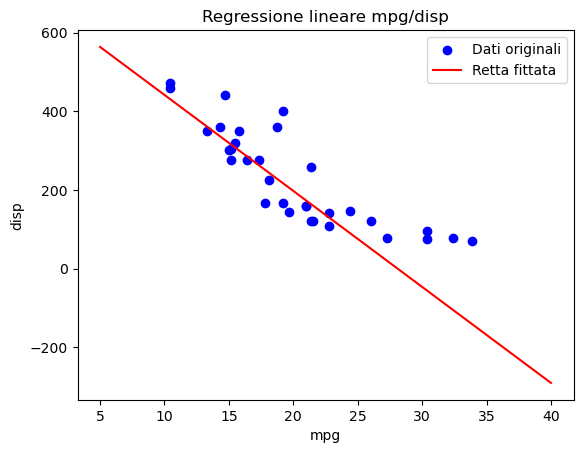

In [43]:
import pandas as pd
import numpy as np

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
# Display the dataframe
#df 
#regressione lineare mpg / disp
#rimozione na 
df.dropna()
mpg = df['mpg']
disp = df['disp']
# Fitting della retta
m, q = np.polyfit(mpg, disp, 1)  # Grado 1 per una retta

# Predizione dei valori fittati
y_fit_np = m * x + q

# Output dei parametri della retta
print(f"Coefficiente angolare (m): {m:.2f}")
print(f"Intercetta (q): {q:.2f}")

# Plot
x = np.linspace(5, 40, 50)
plt.scatter(mpg, disp, label="Dati originali", color="blue")
plt.plot(x, y_fit_np, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("mpg")
plt.ylabel("disp")
plt.title("Regressione lineare mpg/disp")
plt.show()
